In [1]:
import numpy as np

In [2]:
import asyncio

In [3]:
from model_script.signal_noise_for_all_components_from_l2 import signal_noise_for_all_components_from_l2

In [ ]:
file_name='marat'
for i in range(3):
    a=signal_noise_for_all_components_from_l2(norm_func=['evklid'],derivative_rang=[2],
                                              file_name='marat',l2=np.logspace(-3,8,12),
                                              number_of_column=i)
    a.calculation_snr_()
    print(a.result)
    a.paint(save=True)
    

In [3]:
a=signal_noise_for_all_components_from_l2(norm_func=['evklid'],derivative_rang=[2],file_name='marat',l2=np.logspace(-3,8,12))

In [4]:
a.calculation_snr_()

In [5]:
await a.calculation_snr()

In [6]:
b=a.result

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_p

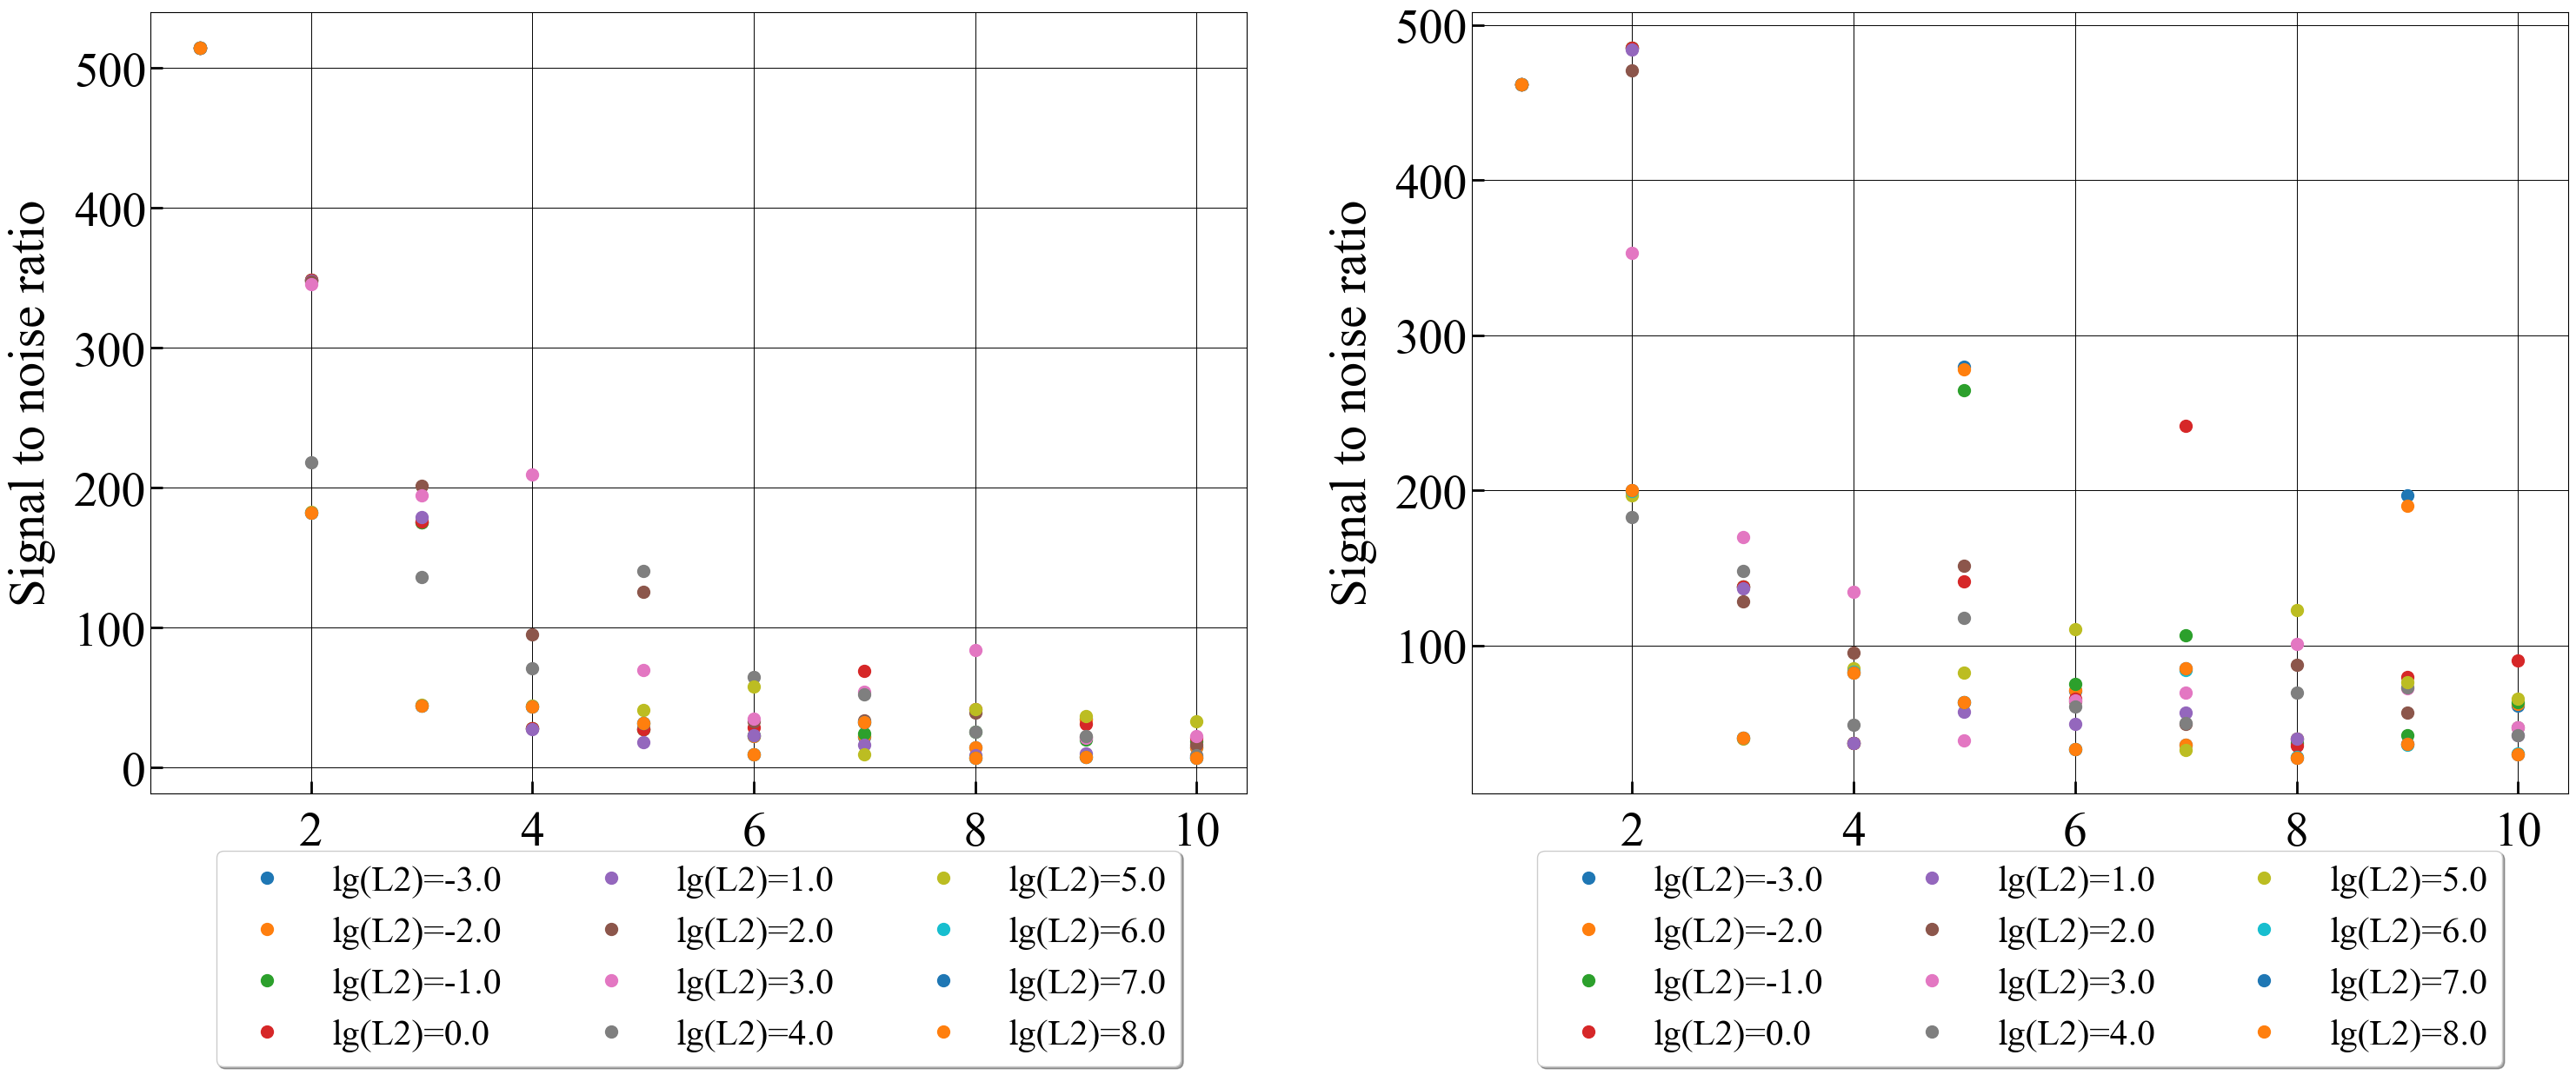

In [5]:
a.paint(save=False)

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/paint_snr_by_n_comp_for_different_l2_coefs.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_p

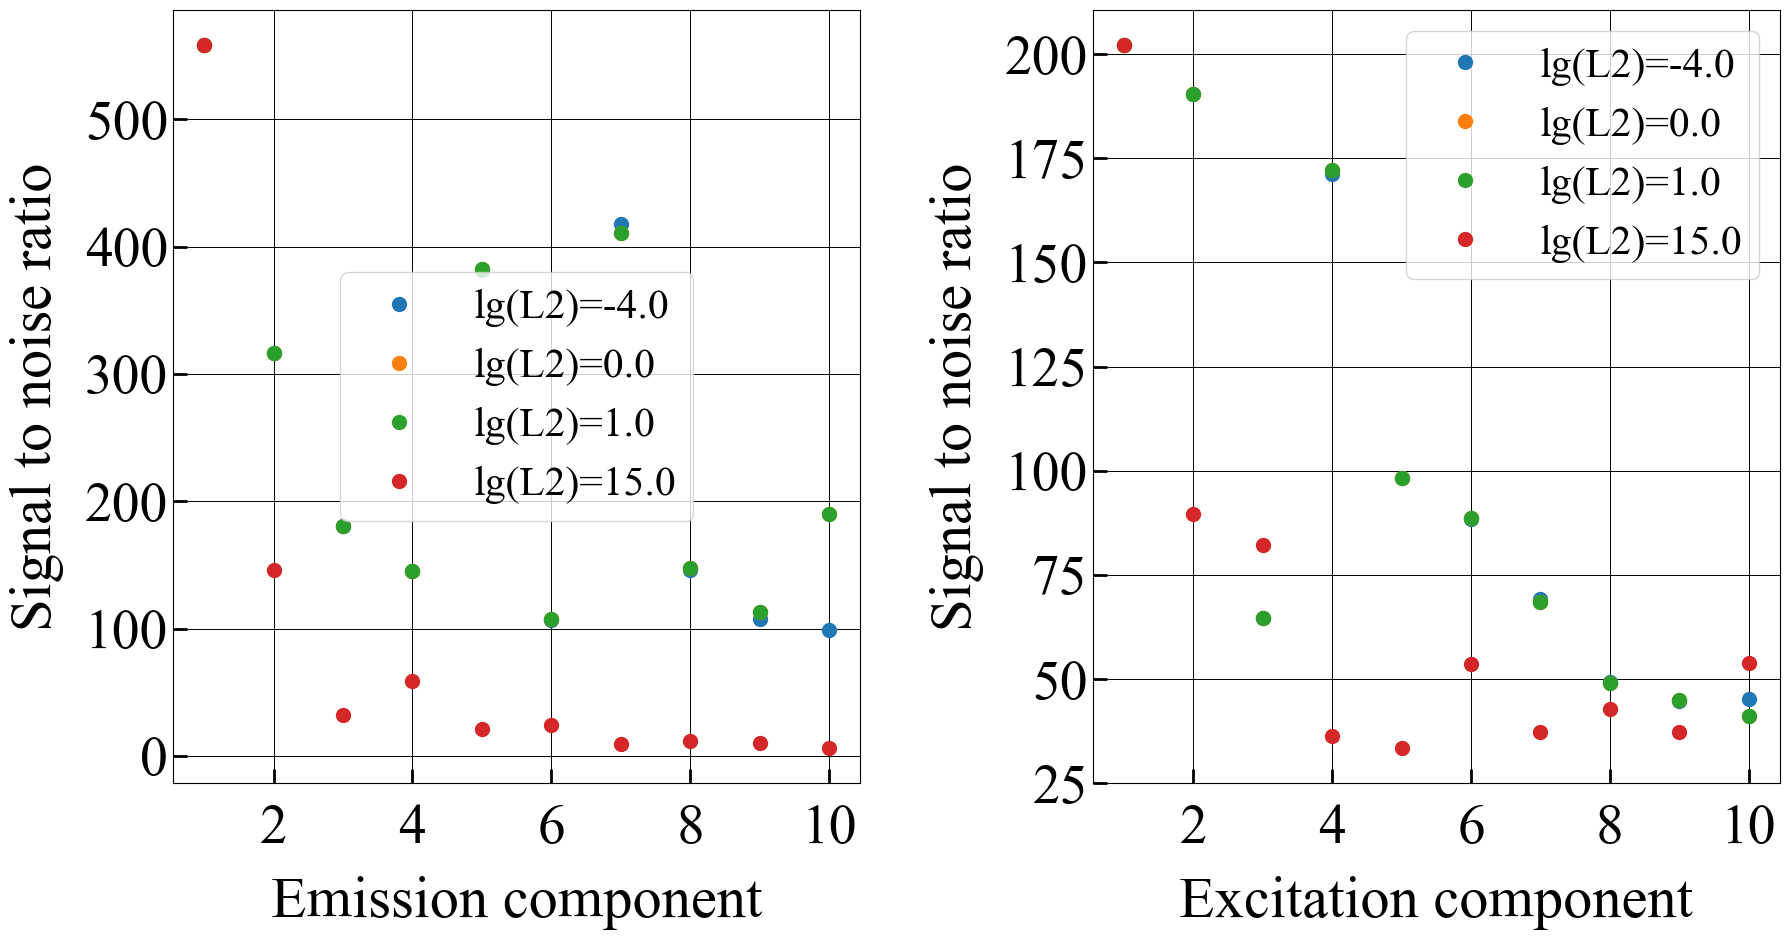

In [5]:
a.paint(save=False)

In [45]:
np.logspace(-3,9,4)

array([1.e-03, 1.e+01, 1.e+05, 1.e+09])

In [7]:
from paint_scripts.paint_snr_by_n_comp_for_different_l2_coefs import paint_snr_by_n_comp_for_different_l2_coefs

In [33]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl

class paint_snr_by_n_comp_for_different_l2_coefs:
    def __init__(self,ax_name_label_fontsize:int=42,
                 title_label_name_fontsize:int=45, text_size_in_lefend:int=42,
                 ax_label_number_font:int=40) -> None:
        self.col=2
        self.row=1
        self.ax_name_label_fontsize=ax_name_label_fontsize
        self.title_label_name_fontsize=title_label_name_fontsize
        self.text_size_in_box=text_size_in_lefend
        self.ax_label_number_font=ax_label_number_font

    def create_save_name(self,data_set_name:str,fluorophore_name:str,save:bool=False,metric_name:str="evklid"):
        dir_name='plots/snr/v1/'+data_set_name+'/'+fluorophore_name+'/'+metric_name
        if save:
            Path(dir_name).mkdir(parents=True, exist_ok=True)
        return dir_name+'/'+fluorophore_name+metric_name
    
    def paint_snr(self,row,col,snr_data_dict:dict,ax_name:str="Excitation",metric_name:str="evklid"):
        self.ax = self.fig.add_subplot(self.spec[row, col])
        l2_coefs_list=list(snr_data_dict.keys())
        #print(metric_name,)
        for i in range(len(l2_coefs_list)):
            snr_list=list()
            n_comp_list=list()      
            #a.resoult[0.1]["Emission"][0]['manhattan'][0] 
            #print(len(snr_data_dict[l2_coefs_list[i]][ax_name]),type())
            for j in range(len(snr_data_dict[l2_coefs_list[i]][ax_name])):
                n_comp_list.append(j+1)
                snr_list.append(snr_data_dict[l2_coefs_list[i]][ax_name][j][metric_name][0])
            self.ax.plot(n_comp_list,
                         snr_list,'.',label="lg(L2)="+str(int(np.log10(l2_coefs_list[i]))),ms=30)
        self.ax.grid(color="black", drawstyle="default", linewidth=0.7)
        self.ax.set_xlabel(ax_name+" component",  fontsize=self.ax_name_label_fontsize,
                    labelpad=15)
        self.ax.set_ylabel("Signal to noise ratio",  fontsize=self.ax_name_label_fontsize,
                    labelpad=15)
        self.ax.tick_params(which='major', length=10, width=2)
        self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
        self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
        self.ax.tick_params(axis='x', pad=15)
        self.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=3,fontsize=30)
        self.ax.get_xaxis().set_tick_params(direction='in')
        self.ax.get_yaxis().set_tick_params(direction='in')

    def painter(self,snr_data_dict:dict,
                 save_file_name:str,fluorophore_name:str,save:bool=False,
                 metric_name:str="evklid"):
        mpl.rc('font',family='Times New Roman')
        self.fig = plt.figure(figsize=(12*self.col, 13.5*self.row),constrained_layout=True)
        #self.fig = plt.figure()
        self.spec = self.fig.add_gridspec(ncols=self.col, nrows=self.row)
        #plt.subplots_adjust(wspace=0.3, hspace=0.3)
        number=0
        for row in range(self.row):
            for col in range(self.col):
                if number==0:
                    ax_name="Emission"
                elif number==1:
                    ax_name="Excitation"
                self.paint_snr(row=row,col=col,ax_name=ax_name,
                               snr_data_dict=snr_data_dict,
                               metric_name=metric_name)
                number+=1
        plt.tight_layout(h_pad=5,w_pad=5)
        
        if save:
            plt.savefig(save_file_name+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
            plt.savefig(save_file_name+'.jpg', format='jpg', dpi=300,bbox_inches='tight')
            plt.savefig(save_file_name+".svg", format="svg",bbox_inches='tight')

        plt.show()

    def main(self,snr_data_dict:dict,
             data_set_name:str,fluorophore_name:str, save:bool=False,metric_name:str="evklid"):
        save_name=self.create_save_name(data_set_name=data_set_name,fluorophore_name=fluorophore_name,
                                        save=save,metric_name=metric_name)
        self.painter(snr_data_dict=snr_data_dict,
                     save_file_name=save_name,fluorophore_name=fluorophore_name,save=save,
                     metric_name=metric_name)


/tmp/ipykernel_14111/273774393.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/tmp/ipykernel_14111/273774393.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/tmp/ipykernel_14111/273774393.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/tmp/ipykernel_14111/273774393.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax

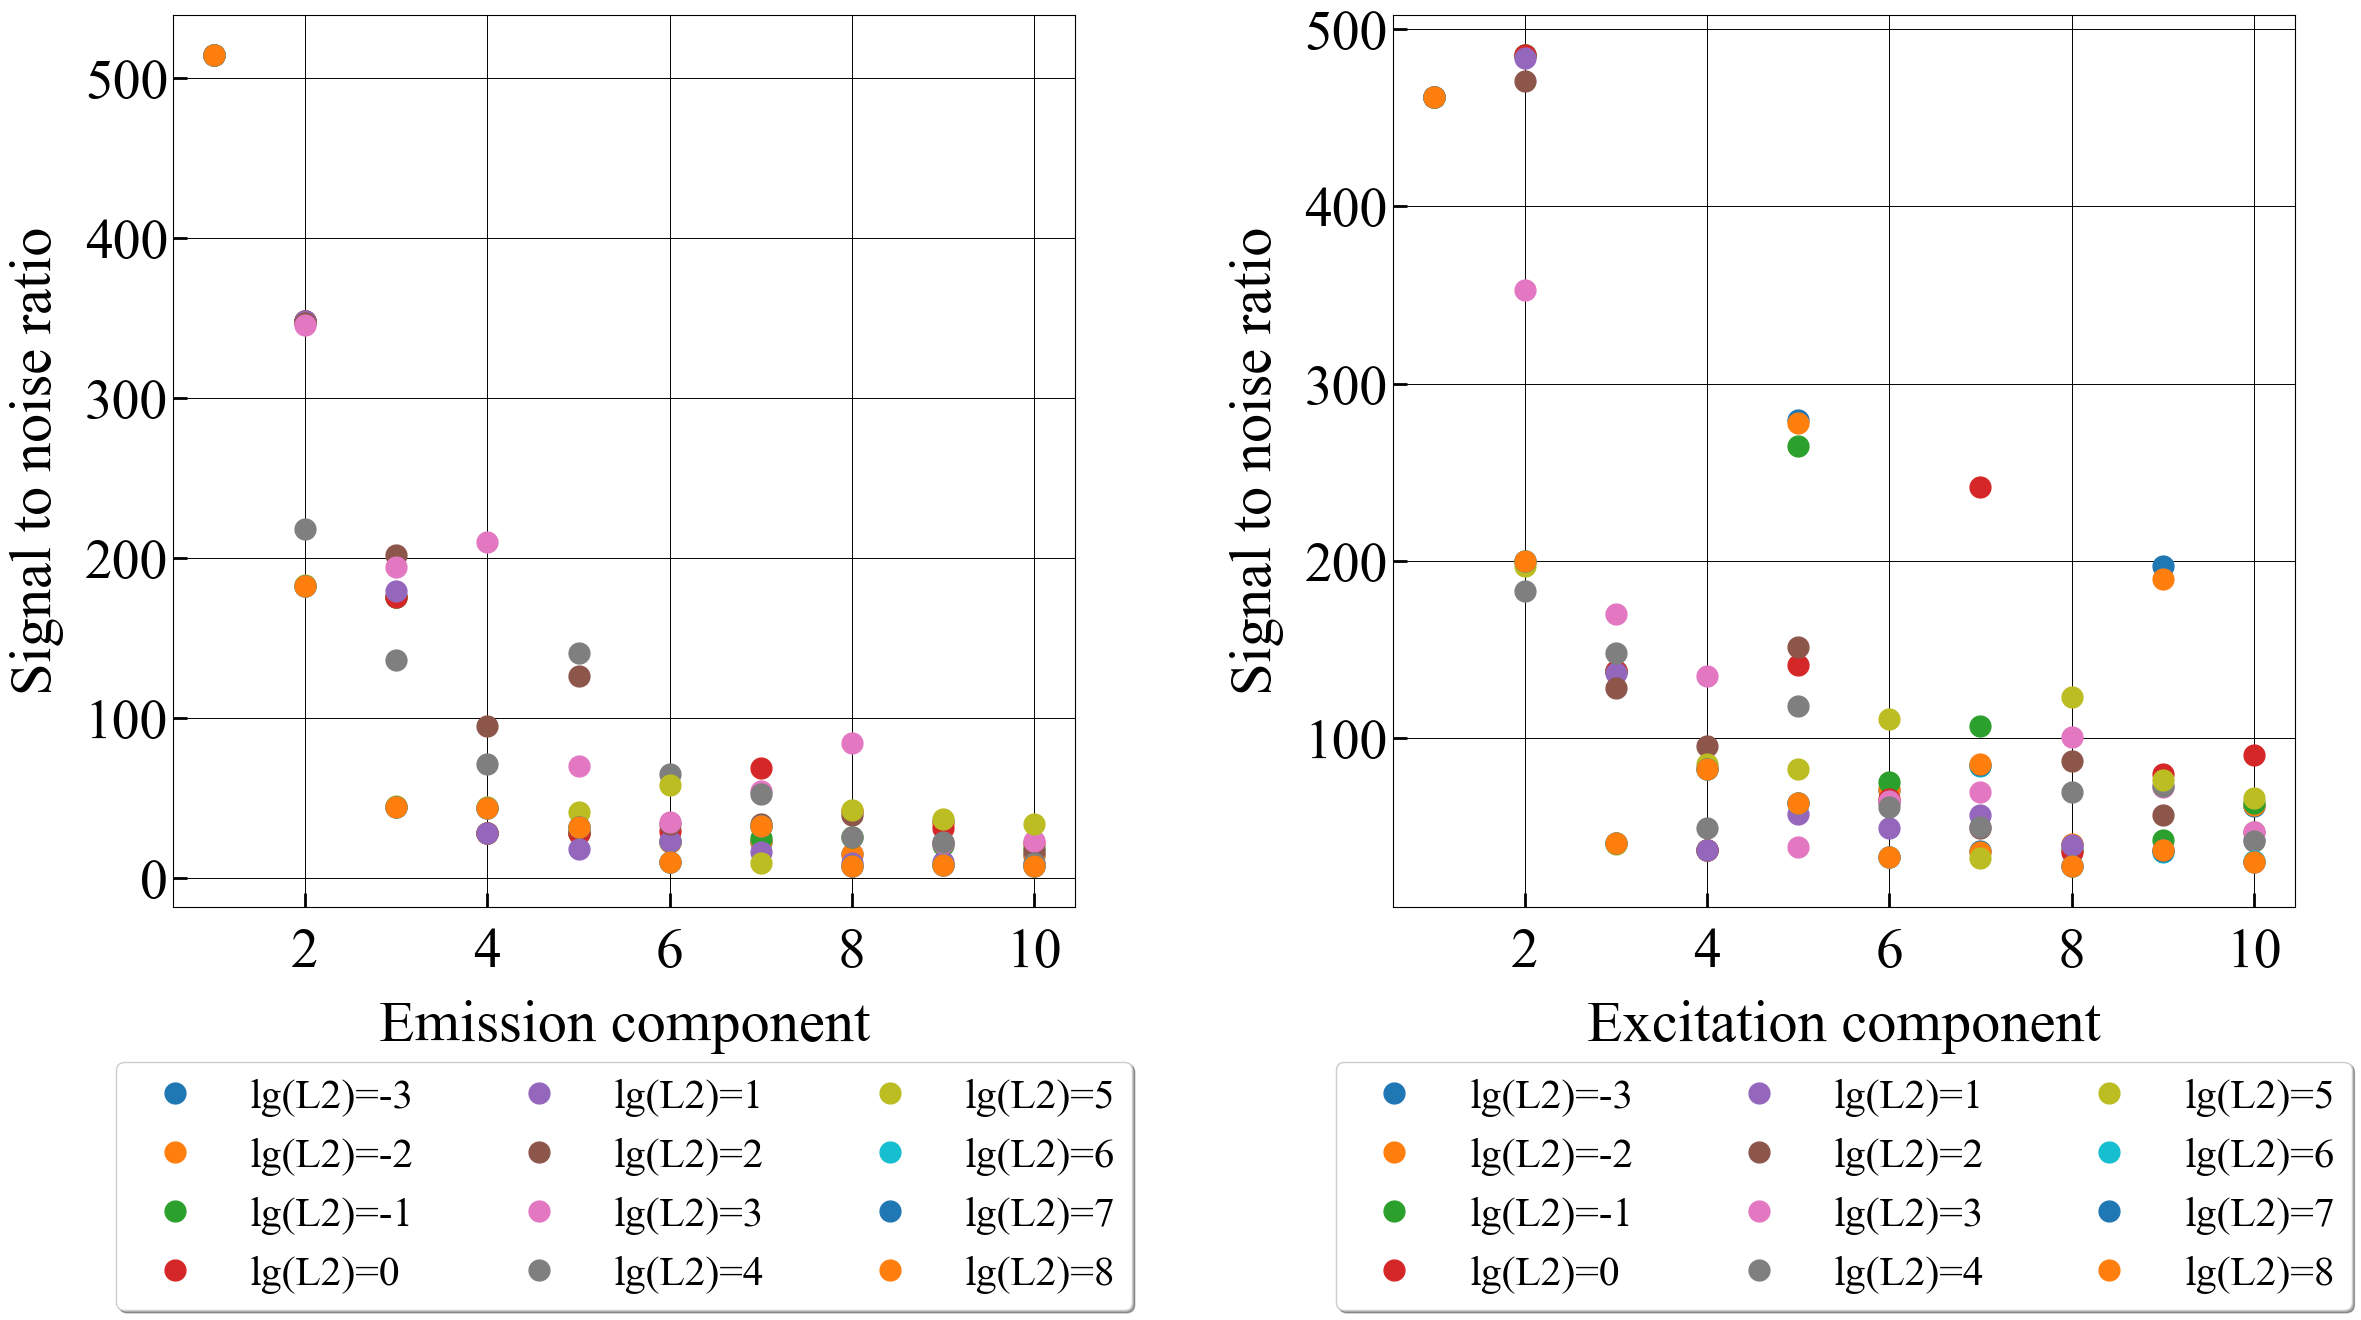

In [34]:
painter=paint_snr_by_n_comp_for_different_l2_coefs()
painter.main(snr_data_dict=b,data_set_name='asmund',
                     fluorophore_name='bess',save=True,metric_name='evklid')